# End-to-end-heart-disease-classification

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build machinde learning model capable of predicting whether or not someone has heart disease baseed on their medical attributes.

## 1. Problem definition
> Given a clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Vleavland database from the UCI Machine Learning Repository: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during thr proof of concept, we'll pursue the project

## 4. Features
This is where you'll get information about each feature of the data.

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


## Preparing the tools
Pandas, Matplotlib and numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

## Data exploration

In [3]:
df['target'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

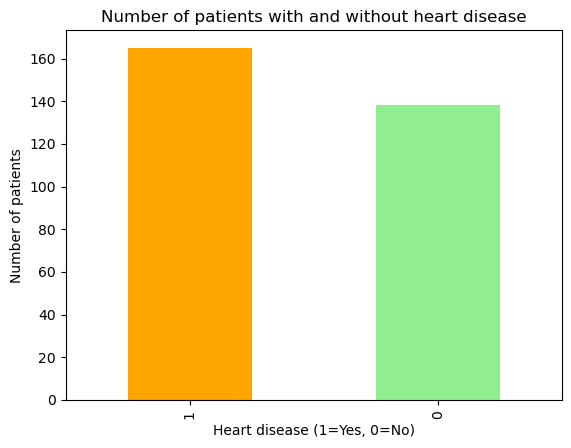

In [4]:
df['target'].value_counts().plot(kind='bar',
                                 title='Number of patients with and without heart disease',
                                 ylabel='Number of patients',
                                 xlabel='Heart disease (1=Yes, 0=No)',
                                 color=['orange', 'lightgreen']);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### Heart Disease Frequency according to Sex

In [7]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

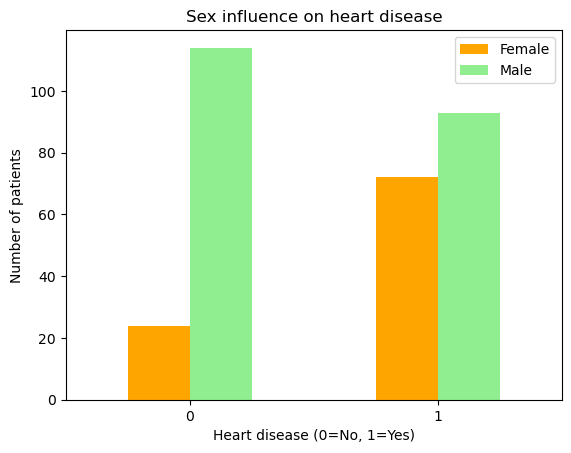

In [8]:
target_sex_tab = pd.crosstab(df['target'], df['sex'])
target_sex_tab.plot(kind='bar',
                    title='Sex influence on heart disease',
                    xlabel='Heart disease (0=No, 1=Yes)',
                    ylabel='Number of patients',
                    color=['orange', 'lightgreen'])
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [9]:
age_vs_thalach_hd = df[df['target'] == 1][['age', 'thalach']]
age_vs_thalach_hd

age  thalach
0     63      150
1     37      187
2     41      172
3     56      178
4     57      163
..   ...      ...
160   56      169
161   55      166
162   41      182
163   38      173
164   38      173

[165 rows x 2 columns]

<Axes: title={'center': 'Age and thalach for patients with heart disease'}, xlabel='Age', ylabel='Thalach'>

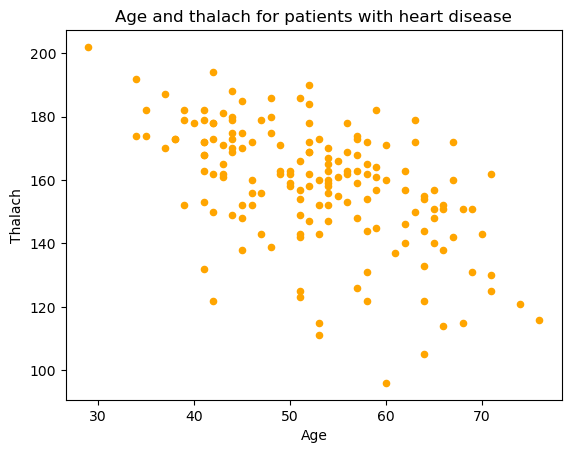

In [10]:
age_vs_thalach_hd.plot(kind='scatter',
                       x='age',
                       y='thalach',
                       title='Age and thalach for patients with heart disease',
                       xlabel='Age',
                       ylabel='Thalach',
                       color='orange')

In [11]:
age_vs_thalach_nohd = df[df['target'] == 0][['age', 'thalach']]
age_vs_thalach_nohd

age  thalach
165   67      108
166   67      129
167   62      160
168   63      147
169   53      155
..   ...      ...
298   57      123
299   45      132
300   68      141
301   57      115
302   57      174

[138 rows x 2 columns]

<Axes: title={'center': 'Age and thalach for patients without heart disease'}, xlabel='Age', ylabel='Thalach'>

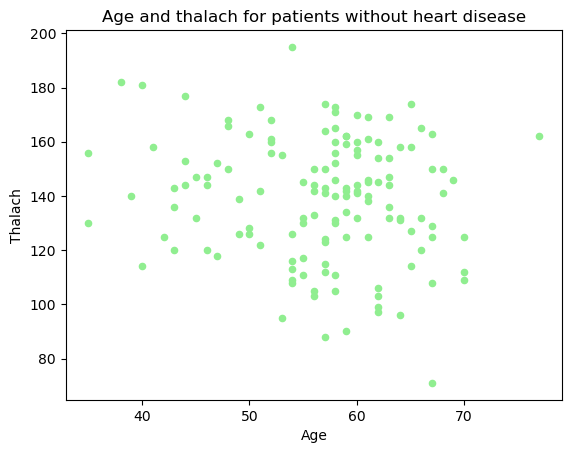

In [12]:
age_vs_thalach_nohd.plot(kind='scatter',
                         x='age',
                         y='thalach',
                         title='Age and thalach for patients without heart disease',
                         xlabel='Age',
                         ylabel='Thalach',
                         color='lightgreen')

<Axes: title={'center': 'Age distribution for patients with heart disease'}, xlabel='Age', ylabel='Frequency'>

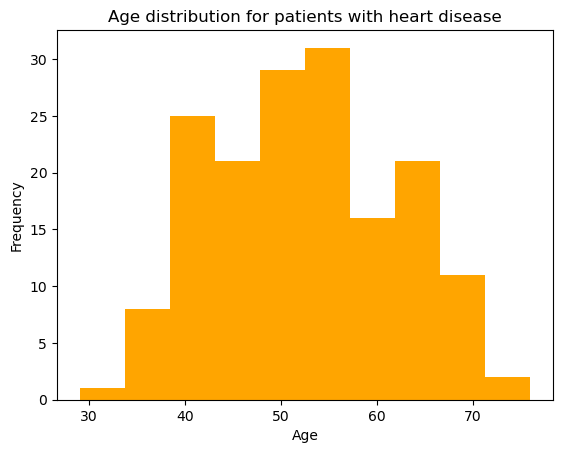

In [13]:
df[df['target'] == 1]['age'].plot(kind='hist',
                                  title='Age distribution for patients with heart disease',
                                  xlabel='Age',
                                  color='orange')

<Axes: title={'center': 'Age distribution for patients without heart disease'}, xlabel='Age', ylabel='Frequency'>

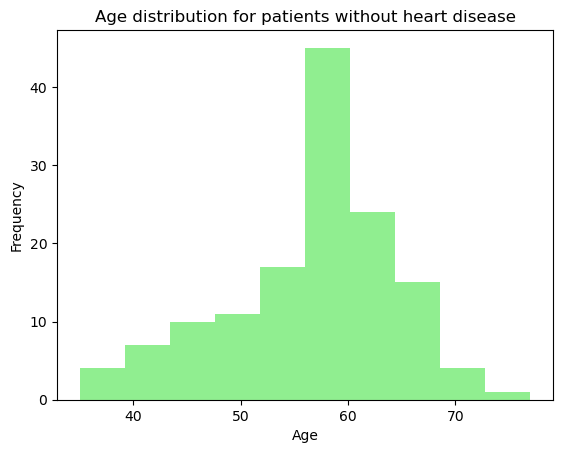

In [14]:
df[df['target'] == 0]['age'].plot(kind='hist',
                                  title='Age distribution for patients without heart disease',
                                  xlabel='Age',
                                  color='lightgreen')

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

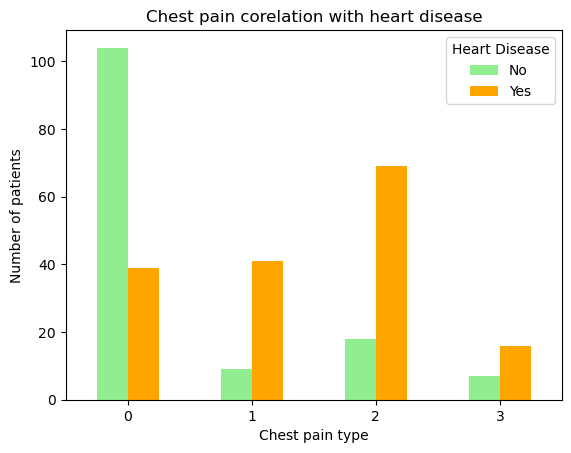

In [15]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar',
                                         title='Chest pain corelation with heart disease',
                                         xlabel='Chest pain type',
                                         ylabel='Number of patients',
                                         color=['lightgreen', 'orange'])
plt.legend(['No', 'Yes'],
           title='Heart Disease')
plt.xticks(rotation=0)

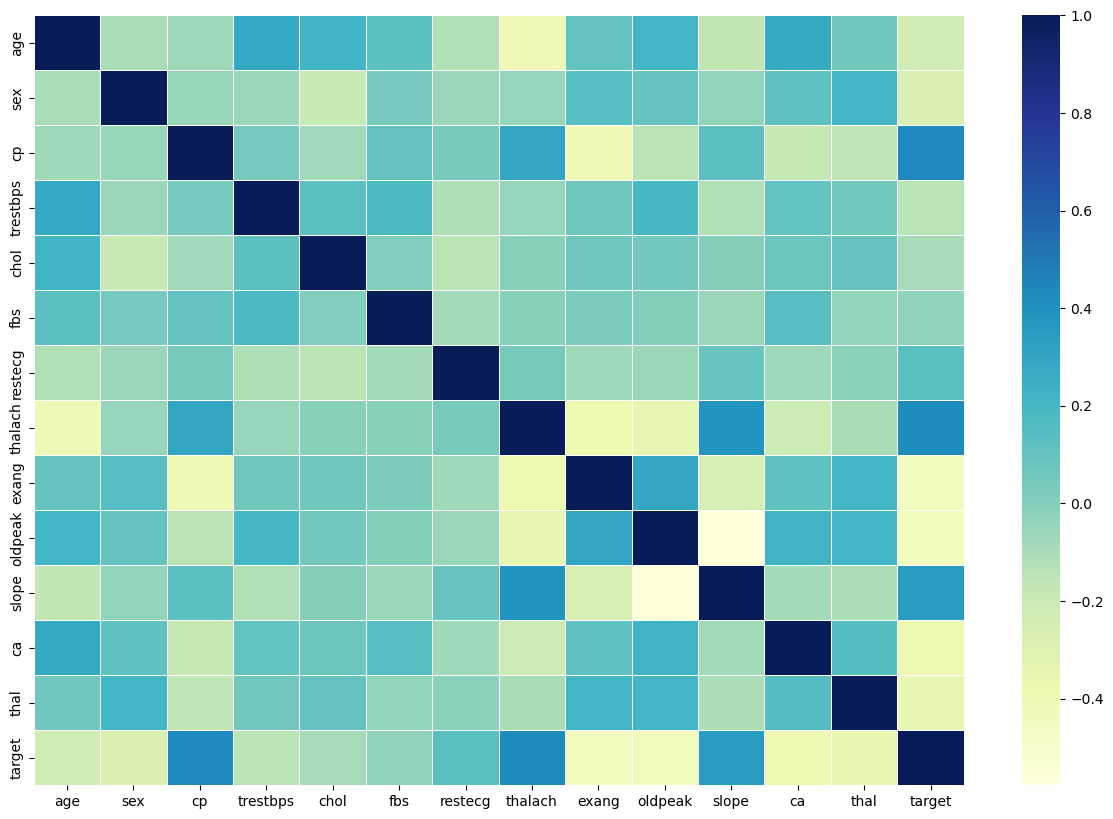

In [16]:
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

In [17]:
corr_mat['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

## Modelling

In [18]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train.shape, df_test.shape

((242, 14), (61, 14))

In [19]:
def feature_label_split(df, label_name:str):
    X = df.drop(label_name, axis=1)
    y = df[label_name]
    return [X,y]

def fit_and_score(classifiers, X_train, X_test, y_train, y_test):
    classifiers_scores={}
    for name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        score = classifier.score(X_test, y_test)
        classifiers_scores.update({name:score})
    return classifiers_scores

In [20]:
X_train, y_train = feature_label_split(df_train, 'target')
X_test, y_test = feature_label_split(df_test, 'target')
X_train.shape, y_train.shape

((242, 13), (242,))

In [21]:
classifiers = {'Logistic Regression':LogisticRegression(),
               'KNN':KNeighborsClassifier(),
               'Random Forest':RandomForestClassifier()}
clf_scores = fit_and_score(classifiers, X_train, X_test, y_train, y_test)

/home/bruno/tools/miniconda3/envs/py-data-science/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

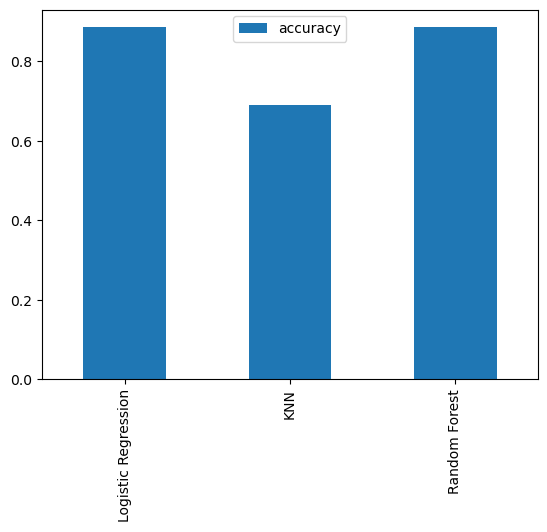

In [22]:
model_compare = pd.DataFrame(clf_scores, index=['accuracy'])
model_compare.T.plot(kind='bar')

## Randomized Search CV

In [23]:
log_reg_grid = {'C':np.logspace(-4, 4, 20),
                'solver':['liblinear']}
random_forest_grid = {'n_estimators':np.arange(10, 1000, 50),
                      'max_depth':[None, 3, 5, 10],
                      'min_samples_split':np.arange(2, 20, 2),
                      'min_samples_leaf':np.arange(1, 20, 2)}

In [24]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [26]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [27]:
random_forest_grid = {'n_estimators':np.arange(100, 1000, 100),
                      'max_depth':[None, 3, 5, 10],
                      'min_samples_split':np.arange(2, 22, 4),
                      'min_samples_leaf':np.arange(1, 22, 4)}

In [28]:
rs_random_forest = RandomizedSearchCV(RandomForestClassifier(),
                                      param_distributions=random_forest_grid,
                                      cv=5,
                                      n_iter=20,
                                      verbose=True)
rs_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  5,  9, 13, 17, 21]),
                                        'min_samples_split': array([ 2,  6, 10, 14, 18]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   verbose=True)

In [29]:
rs_random_forest.best_params_

{'n_estimators': 600,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [31]:
rs_random_forest.score(X_test, y_test)

0.9016393442622951

In [34]:
y_preds = rs_random_forest.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.95      0.90      0.92        40

    accuracy                           0.90        61
   macro avg       0.89      0.90      0.89        61
weighted avg       0.91      0.90      0.90        61

